# Introductory Seaborn

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Comparing Seaborn and matplotlib

### With matplotlib

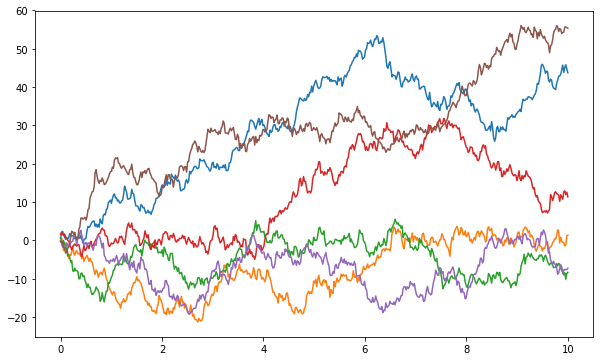

In [60]:
rng = np.random.RandomState(42)
x = np.linspace(0, 10, 500)  # a numpy array linearly spaced between 0,10, 500 values
y = np.cumsum(rng.randn(500, 6), 0)  # Get the cumulative sum of 6 random normal distributions

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(x, y)

### With seaborn

In [2]:
import seaborn as sns
sns.set(style='whitegrid')

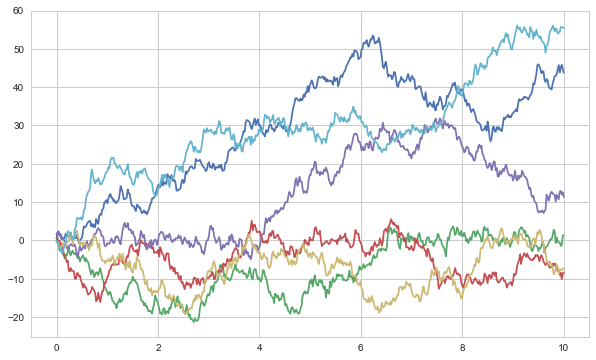

In [81]:
rng = np.random.RandomState(42)
x = np.linspace(0, 10, 500)  # a numpy array linearly spaced between 0,10, 500 values
y = np.cumsum(rng.randn(500, 6), 0)  # Get the cumulative sum of 6 random normal distributions

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(x, y);

### Histograms, KDE, densities

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 3]], size=2000)
df = pd.DataFrame(data, columns=list('xy'))
df.head()

,x,y
0,-1.006485,-1.212045
1,-3.843891,-4.072210
2,0.465153,0.529330
3,0.934612,2.284403
4,0.236207,0.275033


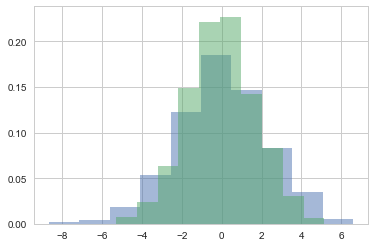

In [94]:
for col in 'xy':
    plt.hist(df[col], density=True, alpha=0.5)

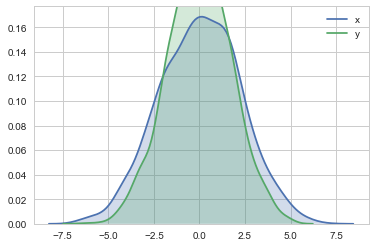

In [10]:
# kde

for col in 'xy':
    sns.kdeplot(df[col], shade=True)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


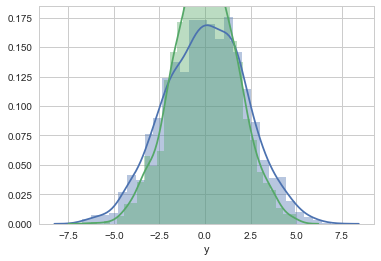

In [12]:
for col in 'xy':
    sns.distplot(df[col])

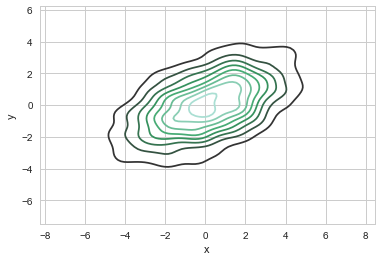

In [14]:
sns.kdeplot(df['x'], df['y'])

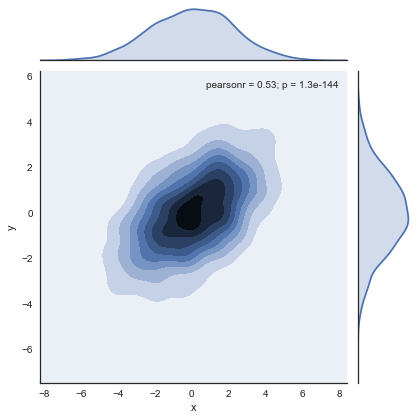

In [18]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', df, kind='kde')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


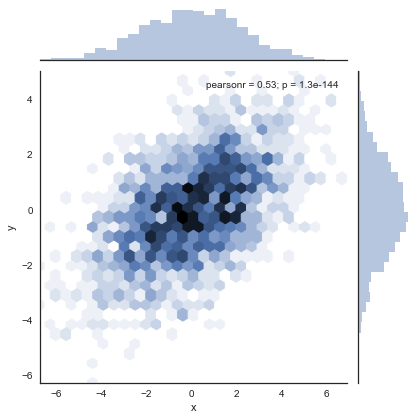

In [19]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', df, kind='hex')

In [26]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


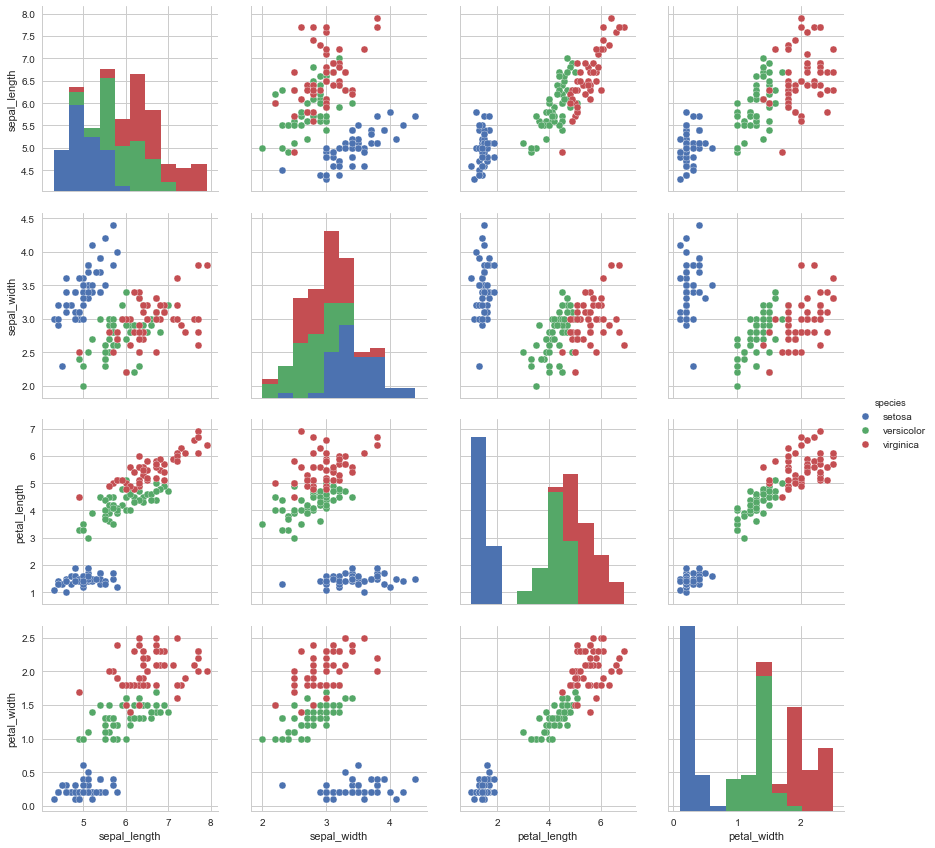

In [32]:
sns.pairplot(iris, hue='species', size=3)

In [34]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
# Make tip percent column
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


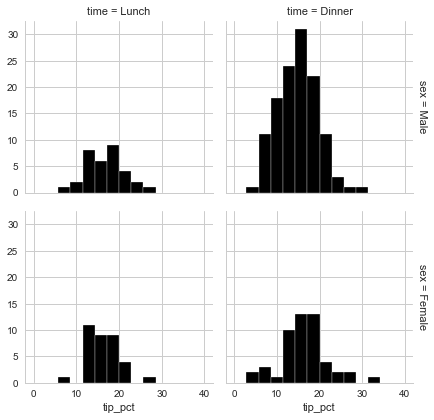

In [54]:
# Make a facet grid with rows being gender, columns being time of day

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)  # Make FacetGrid object
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15), edgecolor='white', color='k') # Map a histogram of tip_pct on to grid. Bins are 0,40,15 linspace.

### Barplots

In [3]:
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


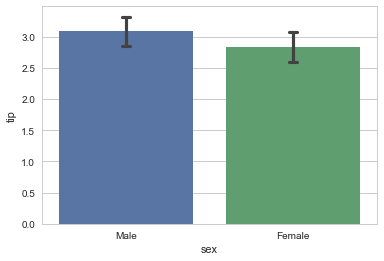

In [11]:
sns.barplot(data=df, x='sex', y='tip', capsize=0.05)